# Exploratory analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Import the adult_income_data.csv
adult_in = pd.read_csv('adult_income_data.csv')

In [17]:
# Show the top five records
adult_in.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [18]:
# Create the script that will read the text file and extraxt the first line 

names = []
with open('adult_income_names.txt', 'r')as f:
    for line in f:
        f.readline()
        var=line.split(':')[0]
        names.append(var)
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [19]:
# Adding 'income' for the 

names.append('Income')
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Income']

In [20]:
# Add names to the dataframe and show first five records to confirm
adult_in = pd.read_csv('adult_income_data.csv',names = names)
adult_in.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [21]:
# Find the missing value
adult_in.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [22]:
# Create a new data frame with only age, education, and occupation
adult_new = adult_in[['age', 'education', 'occupation']]
adult_new

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty
...,...,...,...
32556,27,Assoc-acdm,Tech-support
32557,40,HS-grad,Machine-op-inspct
32558,58,HS-grad,Adm-clerical
32559,22,HS-grad,Adm-clerical


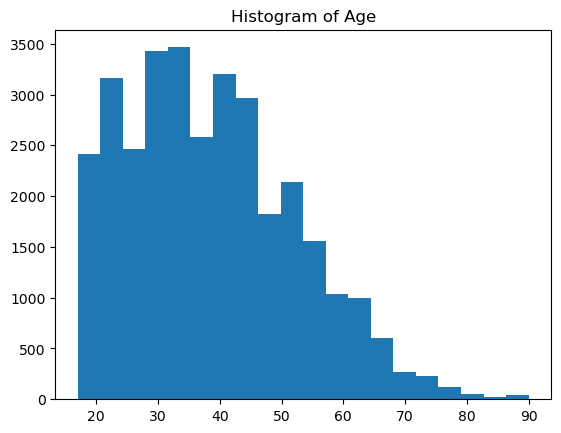

In [23]:
# Plot histogram of age with bin size of 20

plt.hist(adult_new.age, bins = 20)
plt.title('Histogram of Age')
plt.show()

In [24]:
# Function to Strip the whitespace characters 
def strip_whitespace(string):
    return string.strip()

In [25]:
# Apply function strip_whitespce to education
adult_new['edu_stripped']=adult_new['education'].apply(strip_whitespace)
adult_new['education']=adult_new['edu_stripped']
adult_new.drop('edu_stripped', axis=1, inplace=True)

# Apply function strip_whitespace to occupation
adult_new['oc_stripped']=adult_new['occupation'].apply(strip_whitespace)
adult_new['occupation']=adult_new['oc_stripped']
adult_new.drop('oc_stripped', axis=1, inplace=True)

/var/folders/d2/7h1nm74n30zc72pp9ptxr04r0000gn/T/ipykernel_91500/1712425573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_new['edu_stripped']=adult_new['education'].apply(strip_whitespace)
/var/folders/d2/7h1nm74n30zc72pp9ptxr04r0000gn/T/ipykernel_91500/1712425573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_new['education']=adult_new['edu_stripped']
/var/folders/d2/7h1nm74n30zc72pp9ptxr04r0000gn/T/ipykernel_91500/1712425573.py:4: SettingWithCopyWarning: 
A value is trying to be set

In [26]:
# Find the numbers of people between 30-50 and there is 16390 people who ages between 30-50

age_subset = adult_new[(adult_new['age'] >= 30) & (adult_new['age'] <=50)]
age_subset

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service
...,...,...,...
32550,43,Some-college,Craft-repair
32551,32,10th,Handlers-cleaners
32552,43,Assoc-voc,Sales
32553,32,Masters,Tech-support


In [27]:
# Group the records based on age and education and find the mean age

adult_new.groupby('education')['age'].mean()

education
10th            37.429796
11th            32.355745
12th            32.000000
1st-4th         46.142857
5th-6th         42.885886
7th-8th         48.445820
9th             41.060311
Assoc-acdm      37.381443
Assoc-voc       38.553546
Bachelors       38.904949
Doctorate       47.702179
HS-grad         38.974479
Masters         44.049913
Preschool       42.764706
Prof-school     44.746528
Some-college    35.756275
Name: age, dtype: float64

In [28]:
# Group by occupation and show the summary statistics of age
occupation = adult_new.groupby('occupation').describe()['age']
occupation

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


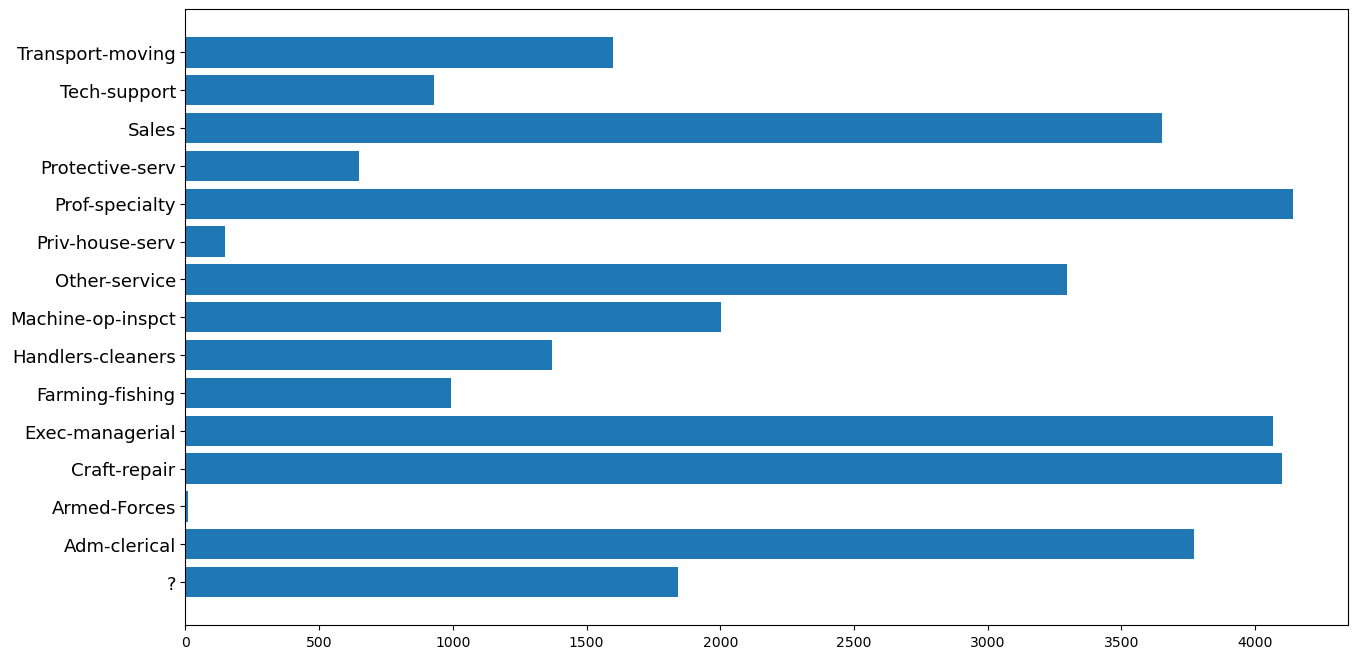

In [29]:
# Plot the graph and find the outliers, and we can see the Armed-Forces is the outlier 
plt.figure(figsize=(15,8))
plt.barh(y=occupation.index, width=occupation['count'])
plt.yticks(fontsize=13)
plt.show()

In [30]:
# Merge the data with common keys
# Create df with workclass, sex and occupation 
adult1 = adult_in[['workclass', 'sex', 'occupation']].sample(5,random_state=101)
adult1

                                            

,workclass,sex,occupation
22357,Private,Female,Machine-op-inspct
26009,Private,Male,Sales
20734,Private,Male,Exec-managerial
17695,Private,Male,Handlers-cleaners
27908,Private,Male,Craft-repair


In [31]:
# Create df with age, education and occupation
adult2 = adult_in[['age', 'education', 'occupation']].sample(5,random_state=101)
adult2

,age,education,occupation
22357,51,HS-grad,Machine-op-inspct
26009,19,11th,Sales
20734,40,HS-grad,Exec-managerial
17695,17,10th,Handlers-cleaners
27908,61,7th-8th,Craft-repair


In [32]:
# Merge the datasets which both have 'occupation'
adult_merge = pd.merge(adult1, adult2, on='occupation', how='inner').drop_duplicates()
adult_merge

,workclass,sex,occupation,age,education
0,Private,Female,Machine-op-inspct,51,HS-grad
1,Private,Male,Sales,19,11th
2,Private,Male,Exec-managerial,40,HS-grad
3,Private,Male,Handlers-cleaners,17,10th
4,Private,Male,Craft-repair,61,7th-8th
